<a href="https://colab.research.google.com/github/Soham-2004/BERT-NER/blob/master/word2vec%2Bconvlstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import nltk
nltk.download('averaged_perceptron_tagger')
!pip install keras==2.2.4
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.
from tqdm import tqdm, trange

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from tqdm import tqdm, trange
from google.colab import files
uploaded = files.upload()
input_data = pd.read_csv("ner.csv", encoding="latin1")
#input_data
input_data['Word'] = input_data['Word'].astype(str)
input_data = input_data.fillna(method="ffill")


Saving ner.csv to ner (1).csv


In [ ]:
input_data

,Word,Tag
0,Adobe,O
1,has,O
2,released,O
3,security,O
4,updates,O
...,...,...
46833,Service,SOFTWARE
46834,Pack,SOFTWARE
46835,2,SOFTWARE
46836,.,O


In [ ]:
s=[]
t=[]
l=[]
word=[]
Tag=[]
Lab=[]
La=[]
Label=[]
w=""
j=0
i=1
z=0
for y in input_data.Word:
    if(y!='EOS'):
        word.append(y)
        La.append(input_data.Tag[z])
        Tag.append(input_data.Tag[j])
        
        
        
        s=i
        t.append(s)
    else:
        i=i+1
        Label.append(La)
        La=[]
    z=z+1
        
    j=j+1
        
t[-1]

#input_data['Sentence #']=t
        
len(Tag)

          

45210

In [ ]:
input_data.Tag.value_counts(normalize=False)
from collections import Counter
counts = Counter(Tag)
print(Tag)

['O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'O', 'EXPLOIT-TARGET', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'EXPLOIT-TARGET', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'VERSION', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ATTACK-PATTERN', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'O', 'O', 'O', 'O', 'O', 'VULNERABILITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ATTACK-PATTERN', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'VULNERABILITY', 'O', 'O', 'SOFTWARE', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'O', 'EXPLOIT-TARGET', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'VULNERABILITY',

In [ ]:
df=pd.DataFrame()
df['Sentence #']=t

df['Word']=word
df['POS'] = df['Word'].apply(lambda x: nltk.pos_tag([x])[0][1])
df['Tag']=Tag
df['Tag'] = df['Tag'].str.replace('STOP', 'O')
df['Tag'] = df['Tag'].str.replace('EXPLOIT-TARGET\x94', 'EXPLOIT-TARGET')
df['Tag'] = df['Tag'].str.replace('ATTACK-PATTERN\x94', 'ATTACK-PATTERN')


    

    



df.head(15)

,Sentence #,Word,POS,Tag
0,1,Adobe,NN,O
1,1,has,VBZ,O
2,1,released,VBN,O
3,1,security,NN,O
4,1,updates,NNS,O
5,1,for,IN,O
6,1,Adobe,NN,SOFTWARE
7,1,Flash,NN,SOFTWARE
8,1,Player,NN,SOFTWARE
9,1,11.5.502.146,CD,VERSION


In [ ]:
dfd=pd.DataFrame()

In [ ]:
type(t)
df = df.fillna(method = 'ffill')
# This is a class te get sentence. The each sentence will be list of tuples with its tag and pos.
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, t) for w,  t in zip(s['Word'].values.tolist(),
                                                       
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped[' '.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sent = getter.sentences


In [ ]:
print('                     This is what a sentence looks like:')
print(sent[89
])


                     This is what a sentence looks like:
[('For', 'O'), ('users', 'O'), ('of', 'O'), ('Adobe', 'SOFTWARE'), ('Reader', 'SOFTWARE'), ('9.4.2', 'SOFTWARE'), ('for', 'O'), ('Windows', 'O'), ('nan', 'EXPLOIT-TARGET'), ('and', 'O'), ('Macintosh', 'O'), ('nan', 'EXPLOIT-TARGET'), ('nan', 'O'), ('Adobe', 'O'), ('has', 'O'), ('made', 'O'), ('available', 'O'), ('the', 'O'), ('update', 'O'), ('nan', 'O'), ('Adobe', 'SOFTWARE'), ('Reader', 'SOFTWARE'), ('9.4.3', 'SOFTWARE'), ('.', 'O')]


In [ ]:
getter

In [ ]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[0]

'Adobe has released security updates for Adobe Flash Player 11.5.502.146 and earlier versions for Windows and Macintosh nan Adobe Flash Player 11.2.202.261 and earlier versions for Linux nan nan Adobe Flash Player 11.1.115.36 and earlier versions for Android 4.x and Adobe Flash Player 11.1.111.31 and earlier versions for Android 3.x and 2 .'

In [ ]:
sent = getter.sentences
sent

[[('Adobe', 'O'),
  ('has', 'O'),
  ('released', 'O'),
  ('security', 'O'),
  ('updates', 'O'),
  ('for', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.5.502.146', 'VERSION'),
  ('and', 'O'),
  ('earlier', 'O'),
  ('versions', 'O'),
  ('for', 'O'),
  ('Windows', 'EXPLOIT-TARGET'),
  ('and', 'O'),
  ('Macintosh', 'EXPLOIT-TARGET'),
  ('nan', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.2.202.261', 'VERSION'),
  ('and', 'O'),
  ('earlier', 'O'),
  ('versions', 'O'),
  ('for', 'O'),
  ('Linux', 'EXPLOIT-TARGET'),
  ('nan', 'O'),
  ('nan', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.1.115.36', 'SOFTWARE'),
  ('and', 'O'),
  ('earlier', 'O'),
  ('versions', 'O'),
  ('for', 'O'),
  ('Android', 'EXPLOIT-TARGET'),
  ('4.x', 'EXPLOIT-TARGET'),
  ('and', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.1.111.31', 'VERSION'),
 

In [ ]:
words = list(set(df["Word"].values))
words.append("ENDPAD")
n_words = len(words); n_words
tags = list(set(df["Tag"].values))
n_tags = len(tags); n_tags
max_len = 75
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
tag2idx

{'ATTACK-PATTERN': 0,
 'COURSE-OF-ACTION': 8,
 'EXPLOIT-TARGET': 6,
 'FILE': 3,
 'MALWARE': 2,
 'O': 5,
 'SOFTWARE': 4,
 'VERSION': 7,
 'VULNERABILITY': 1}

In [ ]:
!pip install pip

In [ ]:
pip install keras


In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sent]

Using TensorFlow backend.


In [ ]:
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)

In [ ]:
y = [[tag2idx[w[1]] for w in s] for s in sent]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])
y.shape

(1628, 75)

In [ ]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]
from sklearn.model_selection import train_test_split
X_tr, y_tr = X, y

print('Raw Sample: ', ' '.join([w[0] for w in sent[0]]))
print('Raw Label: ', ' '.join([w[1] for w in sent[0]]))
print('After processing, sample:', X[0])
print('After processing, labels:', y[0])


Raw Sample:  Adobe has released security updates for Adobe Flash Player 11.5.502.146 and earlier versions for Windows and Macintosh nan Adobe Flash Player 11.2.202.261 and earlier versions for Linux nan nan Adobe Flash Player 11.1.115.36 and earlier versions for Android 4.x and Adobe Flash Player 11.1.111.31 and earlier versions for Android 3.x and 2 .
Raw Label:  O O O O O O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET O EXPLOIT-TARGET O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET O O SOFTWARE SOFTWARE SOFTWARE SOFTWARE O O O O EXPLOIT-TARGET EXPLOIT-TARGET O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET VERSION O O O
After processing, sample: [3894 4453 3784  600 4523 4241 3894 4402 3735 4183 2407 3440 4258 4241
 2224 2407  731 1844 3894 4402 3735 2907 2407 3440 4258 4241 2354 1844
 1844 3894 4402 3735 2408 2407 3440 4258 4241 3539 3408 2407 3894 4402
 3735 4545 2407 3440 4258 4241 3539 4079 2407  212 1907    0    0    0
    0    0    0    0    

In [ ]:
np.array(y).shape

(1628, 75, 9)

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-z3kwoos6
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-z3kwoos6
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=16cc996936e6fb86837a9712973908acd1ceb4ab2c4b7e6dbf921fa29ffa4420
  Stored in directory: /tmp/pip-ephem-wheel-cache-hc1yoqv5/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF


In [ ]:
!pip install tensorflow==1.15.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
X_tr.shape

(1628, 75)

In [ ]:
data=pd.DataFrame()
data['Text_Final']=sentences

data['Label']=Label
data


,Text_Final,Label
0,Adobe has released security updates for Adobe ...,"[O, O, O, O, O, O, SOFTWARE, SOFTWARE, SOFTWAR..."
1,x. These updates address vulnerabilities that ...,"[O, O, O, O, O, O, O, O, O, ATTACK-PATTERN, O,..."
2,Adobe is aware of reports that CVE-2013-0633 i...,"[SOFTWARE, O, O, O, O, O, VULNERABILITY, O, O,..."
3,The exploit for CVE-2013-0633 targets the Acti...,"[O, O, O, VULNERABILITY, O, O, SOFTWARE, O, O,..."
4,Adobe is also aware of reports that CVE-2013-0...,"[O, O, O, O, O, O, O, VULNERABILITY, O, O, O, ..."
...,...,...
1623,The vulnerabilities could also be used by Wind...,"[O, O, O, O, O, O, O, O, SOFTWARE, O, O, O, O,..."
1624,An attacker who successfully exploited these v...,"[O, O, O, O, O, O, O, O, O, O, ATTACK-PATTERN,..."
1625,Users whose accounts are configured to have fe...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1626,This security update is rated Important for Mi...,"[O, O, O, O, O, O, O, SOFTWARE, SOFTWARE, SOFT..."


In [ ]:
sentences[567]

'The researchers said they submitted the test buy results to a database nan run by the International AntiCounterfeiting Coalition nan ( IACC ) nan a Washington nan D.C.-based non-profit organization devoted to combating product counterfeiting and piracy .'

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sentences, test_size=0.10, random_state=42)

In [ ]:
len(train)

1465

In [ ]:
train[4]

'Customers who have automatic updating enabled and configured to check online for updates from Microsoft Update typically will not need to take any action because this security update will be downloaded and installed automatically .'

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,np.array(y), test_size=0.10, random_state=42)

In [ ]:
len(X_train)

1465

In [ ]:
np.array(Y_train).shape

(1465, 75, 9)

In [ ]:
data_new=pd.DataFrame()
data_new['train']=train
data_new

,train
0,net .
1,Jscript nan .
2,Adobe recommends users of Adobe Flash Player 1...
3,'' Unspecified vulnerability in the Java Runti...
4,Customers who have automatic updating enabled ...
...,...
1460,NEC Universal RAID Utility 1.4 Rev 680 and ear...
1461,The security update addresses the vulnerabilit...
1462,'' Use-after-free vulnerability in Microsoft I...
1463,The security update addresses the vulnerabilit...


In [ ]:
len(sentences)

1628

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
data_new['tokens'] = data_new.apply(lambda row: nltk.word_tokenize(row['train']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data_new.tokens[1451]

['Customers',
 'who',
 'have',
 'not',
 'enabled',
 'automatic',
 'updating',
 'need',
 'to',
 'check',
 'for',
 'updates',
 'from',
 'Microsoft',
 'Update',
 'and',
 'install',
 'this',
 'update',
 'manually',
 '.']

In [ ]:
all_training_words = [word for tokens in data_new["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_new["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

41282 words total, with a vocabulary size of 4343
Max sentence length is 141


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models import Word2Vec
from gensim import models
from gensim.models.keyedvectors import KeyedVectors


In [ ]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_new['train'].tolist())
training_sequences = tokenizer.texts_to_sequences(data_new['train'].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 3651 unique tokens.


In [ ]:
data_new

,train,tokens
0,net .,"[net, .]"
1,Jscript nan .,"[Jscript, nan, .]"
2,Adobe recommends users of Adobe Flash Player 1...,"[Adobe, recommends, users, of, Adobe, Flash, P..."
3,'' Unspecified vulnerability in the Java Runti...,"['', Unspecified, vulnerability, in, the, Java..."
4,Customers who have automatic updating enabled ...,"[Customers, who, have, automatic, updating, en..."
...,...,...
1460,NEC Universal RAID Utility 1.4 Rev 680 and ear...,"[NEC, Universal, RAID, Utility, 1.4, Rev, 680,..."
1461,The security update addresses the vulnerabilit...,"[The, security, update, addresses, the, vulner..."
1462,'' Use-after-free vulnerability in Microsoft I...,"['', Use-after-free, vulnerability, in, Micros..."
1463,The security update addresses the vulnerabilit...,"[The, security, update, addresses, the, vulner..."


In [ ]:
!pip install genism

ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


In [ ]:
# 2. download google word2vec pretrained embedding 

!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)


--2020-08-09 07:33:59--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.93|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 1647046227 (1.5G), 407296602 (388M) remaining [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[+++++++++++++++====>]   1.53G  58.6MB/s    in 6.3s    

2020-08-09 07:34:05 (61.3 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = data_new['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
training_embeddings = get_word2vec_embeddings(word2vec, data_new, generate_missing=True)

EMBEDDING_DIM = 300

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)

In [ ]:
train_word_index

{'nan': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'in': 5,
 'adobe': 6,
 'for': 7,
 'of': 8,
 'a': 9,
 'update': 10,
 'windows': 11,
 '1': 12,
 'vulnerability': 13,
 '2': 14,
 'that': 15,
 'microsoft': 16,
 'reader': 17,
 'this': 18,
 '3': 19,
 '9': 20,
 'users': 21,
 'x': 22,
 'before': 23,
 'security': 24,
 'earlier': 25,
 '4': 26,
 'remote': 27,
 'via': 28,
 'acrobat': 29,
 'an': 30,
 '10': 31,
 '0': 32,
 'attackers': 33,
 'versions': 34,
 'macintosh': 35,
 'allows': 36,
 'on': 37,
 'is': 38,
 'vulnerabilities': 39,
 'information': 40,
 '7': 41,
 'by': 42,
 'or': 43,
 '6': 44,
 'server': 45,
 'have': 46,
 'user': 47,
 'could': 48,
 "''": 49,
 '5': 50,
 'not': 51,
 'affected': 52,
 '8': 53,
 'with': 54,
 'crafted': 55,
 'service': 56,
 'recommends': 57,
 'java': 58,
 'as': 59,
 'are': 60,
 'from': 61,
 'see': 62,
 'allow': 63,
 'more': 64,
 'system': 65,
 'vectors': 66,
 'who': 67,
 'unspecified': 68,
 'code': 69,
 'cause': 70,
 'through': 71,
 "'s": 72,
 'attacker': 73,
 'arbitrary': 74,


In [ ]:

EMBEDDING_DIM = 300
print(train_embedding_weights.shape)

max_sequence_length=max_len
num_words=n_words 
embedding_dim=EMBEDDING_DIM
num_tags = df['Tag'].nunique()
# Model architecture
embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[train_embedding_weights],
                            input_length=max_sequence_length,
                            trainable=False)

(3652, 300)



In [ ]:

from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
dropout=0.2
from keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
num_tags = df['Tag'].nunique()
# Model architecture
input = Input(shape=(max_len,))
model = embedding_layer(input)  # 20-dim embedding

model = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(model)
model = LSTM(256, return_sequences=True)(model)
output_layer = Dense(num_tags, activation='softmax')(model)
model = Model(inputs=input, outputs=output_layer)


model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 300)           1391700   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 32)            76832     
_________________________________________________________________
lstm_2 (LSTM)                (None, 75, 256)           295936    
_________________________________________________________________
dense_2 (Dense)              (None, 75, 9)             2313      
Total params: 1,766,781
Trainable params: 375,081
Non-trainable params: 1,391,700
_________________________________________________________________
None


In [ ]:

from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

history = model.fit(X_train, np.array(Y_train), batch_size=128, epochs=45,                    validation_split=0.1, verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1318 samples, validate on 147 samples
Epoch 1/45
1318/1318 [==============================] - 10s 8ms/step - loss: 1.3276 - acc: 0.8457 - val_loss: 0.6100 - val_acc: 0.9302
Epoch 2/45
1318/1318 [==============================] - 9s 7ms/step - loss: 0.5697 - acc: 0.9225 - val_loss: 0.4514 - val_acc: 0.9302
Epoch 3/45
1318/1318 [==============================] - 9s 7ms/step - loss: 0.4418 - acc: 0.9225 - val_loss: 0.3891 - val_acc: 0.9302
Epoch 4/45
1318/1318 [==============================] - 9s 7ms/step - loss: 0.3884 - acc: 0.9225 - val_loss: 0.3509 - val_acc: 0.9302
Epoch 5/45
1318/1318 [==============================] - 9s 7ms/step - loss: 0.3476 - acc: 0.9225 - val_loss: 0.3189 - val_acc: 0.9302
Epoch 6/45
1318/1318 [==============================] - 9s 7ms/step - loss: 0.3223 - acc: 0.9225 - val_loss: 0.3014 - val_acc: 0.9302
Epoch 7/45
1318/1318 [==============================

In [ ]:
np.array(Y_train).shape

(1465, 75, 9)

In [ ]:
hist = pd.DataFrame(history.history)


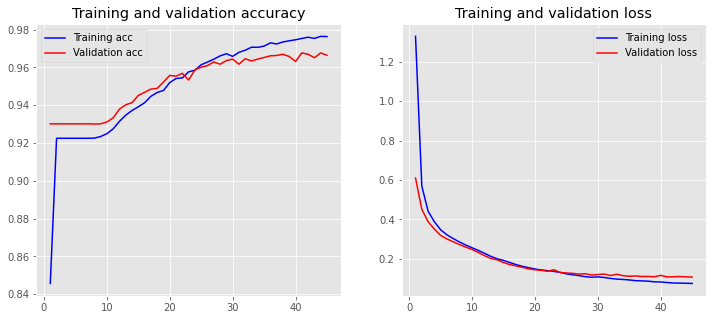

In [ ]:
import matplotlib.pyplot as plt
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
!pip install seqeval


  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=ed9644fc340633e83e1fb00409e0f8dc49dd3f1f276b590ee9c6c0f29d688014
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
test_pred = model.predict(X_test, verbose=1)

163/163 [==============================] - 1s 4ms/step


In [ ]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(Y_test)

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 79.9%


In [ ]:
print(classification_report(test_labels, pred_labels))

               precision    recall  f1-score   support

      VERSION       0.29      0.26      0.27        47
       TARGET       0.96      0.87      0.91       124
         FILE       0.00      0.00      0.00         7
     SOFTWARE       0.91      0.86      0.88       535
      PATTERN       0.48      0.50      0.49        80
      MALWARE       0.00      0.00      0.00         3
VULNERABILITY       0.00      0.00      0.00         7
       ACTION       0.25      0.33      0.29         3

    micro avg       0.83      0.77      0.80       806
    macro avg       0.82      0.77      0.79       806



In [ ]:
score=model.evaluate(X_test, np.array(Y_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

163/163 [==============================] - 0s 3ms/step
Test loss: 0.09323050598242531
Test accuracy: 0.9732515299978431


In [ ]:
i = 161

p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(Y_test[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

Word           ||True ||Pred
This           : O     O
security       : O     O
update         : O     O
is             : O     O
rated          : O     O
Critical       : O     O
for            : O     O
Internet       : SOFTWARE SOFTWARE
Explorer       : SOFTWARE SOFTWARE
6              : SOFTWARE SOFTWARE
Internet       : SOFTWARE SOFTWARE
Explorer       : SOFTWARE SOFTWARE
7              : SOFTWARE SOFTWARE
Internet       : SOFTWARE SOFTWARE
Explorer       : SOFTWARE SOFTWARE
8              : SOFTWARE SOFTWARE
and            : O     O
Internet       : SOFTWARE SOFTWARE
Explorer       : SOFTWARE SOFTWARE
9              : SOFTWARE SOFTWARE
on             : O     O
Windows        : SOFTWARE EXPLOIT-TARGET
clients        : SOFTWARE O
and            : O     O
Moderate       : O     O
for            : O     O
Internet       : SOFTWARE SOFTWARE
Explorer       : SOFTWARE SOFTWARE
6              : SOFTWARE SOFTWARE
Internet       : SOFTWARE SOFTWARE
Explorer       : SOFTWARE SOFTWARE
7      

In [ ]:
y=np.array(y)
y.shape

(1628, 75, 9)

!pip install -q iterative-stratification




In [ ]:
!pip install -q iterative-stratification
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.3MB/s 


In [ ]:
y=np.array(y)
y.shape

(1628, 75, 9)

In [ ]:
X.shape

(1628, 75)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
num_folds = 10

In [ ]:
# Normalize data
input_train = X_train / 255
input_test = X_test / 255

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
batch_size=128
no_epochs=45
verbosity=1
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):




  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  num_tags = df['Tag'].nunique()
# Model architecture
  input = Input(shape=(max_len,))
  model = embedding_layer(input)  # 20-dim embedding

  model = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(model)
  model = LSTM(256, return_sequences=True)(model)
  output_layer = Dense(num_tags, activation='softmax')(model)
  model = Model(inputs=input, outputs=output_layer)


  model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
  print(model.summary())

  

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 300)           1391700   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 75, 32)            76832     
_________________________________________________________________
lstm_3 (LSTM)                (None, 75, 256)           295936    
_________________________________________________________________
dense_3 (Dense)              (None, 75, 9)             2313      
Total params: 1,766,781
Trainable params: 375,081
Non-trainable params: 1,391,700
_________________________________________________________________
None
Epoch 1/45
1465/1465 [==